# Introduction to RSEIloution: R tools for deriving air toxicity for geographic coordinates

---

The RSEIloution package attaches annual air toxicity data from the U.S. Environmental Protection Agency's (EPA) Risk-Screening Environmental Indicators (RSEI) model to geolocated points. This tutorial demonstrates the flexibility avaible in how points can be passed in and toxicity data returned from the RESI-loution package.

Load the code

In [2]:
source('RSEIAssignedToPoints.R')

---

### Initial example using single state, single year - R data frame

We begin with the simplest case: passing an R `data.frame` object containing coordinates in long/lat projection from a single state and a single year. In this example there are 3 points in Rhode Island corresponding to the year 2002. 

In [3]:
# Build a data frame of points
sp_df<-data.frame()
sp_df<-data.frame(rbind(
#RI pts
c(41.486541,-71.308569),
c(41.812033,-71.414641),
c(41.8514,-71.4047633)))
colnames(sp_df)<-c("latitude","longitude")
sp_df

latitude,longitude
<dbl>,<dbl>
41.48654,-71.30857
41.81203,-71.41464
41.85140,-71.40476


Since all the points are in a single state and single year, we can pass the two-character state code to the `state` parameter and the four digit year to the `year` parameter. We also need to tell the function the column names containing the coordiantes.

<span style="color:red">WARNING. The first time pulling data for a particular state-year combo is very time consuming. Depending on download speeds, computational power and the size of the state, this could take from a couple minutes to over an hour.</span>

In [4]:
spdf <- appendRSEI(data=sp_df,state='ri',year=2002,x_name='longitude',y_name='latitude')

The function returns an R "Spatial Points Data Frame." This object type contains its data in the `data` attribute. We can see that in addition to the lon/lat originally passed in, there are now columns for the state, year and ID added. The remaining columns come from the RSEI database starting with the total toxicity for the 0.5 mile square pixel in which the point falls, the pixel's population and the toxicity of specific chemicals in that pixel. Note that RSEI tracks over 600 toxic chemicals, the R object contains only those chemicals appearing near at least one of the points.

In [5]:
spdf@data

New_ID,latitude,longitude,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,X1.2.4.Trimethylbenzene,Vanadium.and.vanadium.compounds,Vinyl.acetate,o.Xylene,Xylene..mixed.isomers.,Zinc.and.zinc.compounds,n.Hexane,Diisocyanates,Polycyclic.aromatic.compounds,Benzo.g.h.i.perylene
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41.48654,-71.30857,ri,2002,448.2835,287.116,13.175385,NA,NA,⋯,0.01264093,0.0016691653,2.052557e-05,NA,0.1721228,0.01222042,0.0007857093,NA,0.1066588,0.0001116548
2,41.81203,-71.41464,ri,2002,6203.0493,4821.650,4.573192,0.03286160,0.0218578,⋯,0.34941655,0.0007087670,2.555281e-05,0.000156988,0.1935253,0.05441026,0.0111554160,0.2608572,16.0653861,0.0017526866
3,41.85140,-71.40476,ri,2002,3478.6836,2696.490,3.819946,0.03490335,0.0440704,⋯,0.35054541,0.0007378543,2.399228e-05,0.000273019,0.3100584,0.08810834,0.0121911649,0.2684010,18.8211072,0.0019489345


The data can be subset for easier viewing of specific toxins, for examaple total toxicity and lead.

In [6]:
spdf@data[,c("latitude","longitude","state","year","Toxicity","Lead.and.lead.compounds")]

latitude,longitude,state,year,Toxicity,Lead.and.lead.compounds
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
41.48654,-71.30857,ri,2002,448.2835,3.849342
41.81203,-71.41464,ri,2002,6203.0493,2189.540590
41.85140,-71.40476,ri,2002,3478.6836,342.229615


A powerful feature of the RSEI data is that it is additive. This means that the sum of toxicity from the invidual chemicals equals the total toxicity.

In [7]:
# reported total toxicity for row 2
spdf@data[2,'Toxicity']

[1] 6203.049

In [8]:
# sum of indivdual toxicities for row 2
rowSums(spdf@data[2, !names(spdf@data) %in% c('New_ID','state','year','latitude','longitude','Toxicity','Pop')], na.rm=TRUE)

2 
6203.049

We can also plot toxicity using the full raster data.

In [9]:
# read in the raster data
ri_2002 = readRDS("grid_ri_2002.rds")

Plot the log of total toxicity.

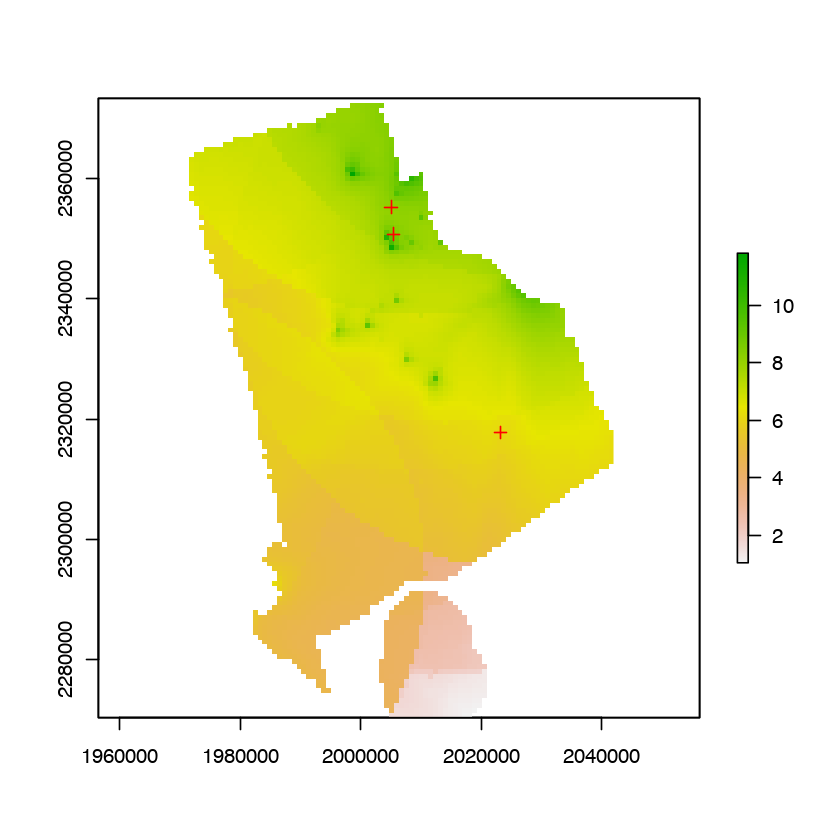

In [10]:
#png('ri_2002_toxicity.png')
# plot the raster
plot(log(ri_2002$Total)) 
# convert the points to the same projection as the raster
rsei_proj <- "+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"
spdf_proj <- spTransform(spdf,CRSobj = CRS(rsei_proj)) 
# plot the points
plot(spdf_proj, add=TRUE, col='red')
#dev.off()

Plot the log of lead air toxicity using the same scale as total toxicity.

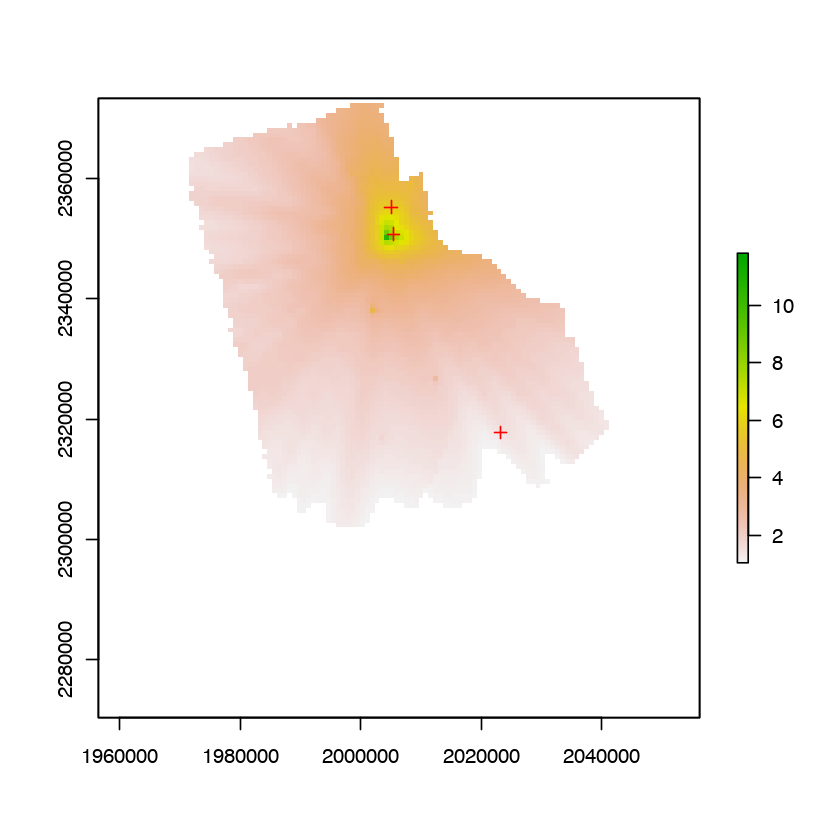

In [11]:
#png('ri_2002_lead.png')
tox_min = cellStats(log(ri_2002$Total), stat='min')  # min of total toxicity
tox_max = cellStats(log(ri_2002$Total), stat='max')  # max of total toxicity
plot(log(ri_2002$Lead.and.lead.compounds), zlim=(c(tox_min, tox_max)))
plot(spdf_proj, add=TRUE, col='red')
#dev.off()

### Single state, multiple years - R data frame

This example contains points in Rhode Island for 2002 and 2003.

In [12]:
sp_df<-data.frame()
sp_df<-data.frame(rbind(
#RI pts
c(41.486541,-71.308569),
c(41.486541,-71.308569),
c(41.812033,-71.414641),
c(41.812033,-71.414641),
c(41.8514,-71.4047633),
c(41.8514,-71.4047633)))
colnames(sp_df)<-c("latitude","longitude")
sp_df$Year<-c(2002,2003,2002,2003,2002,2003)
sp_df

latitude,longitude,Year
<dbl>,<dbl>,<dbl>
41.48654,-71.30857,2002
41.48654,-71.30857,2003
41.81203,-71.41464,2002
41.81203,-71.41464,2003
41.85140,-71.40476,2002
41.85140,-71.40476,2003


If we want RSEI data for mulitple years we must label each row with its year, and then tell the function the name of the column containing the year data.

In [13]:
spdf <- appendRSEI(data=sp_df,state='ri',year='Year',x_name='longitude',y_name='latitude')

In [14]:
spdf@data

New_ID,latitude,longitude,Year,state,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,Vinyl.acetate,o.Xylene,Xylene..mixed.isomers.,Zinc.and.zinc.compounds,n.Hexane,Diisocyanates,Polycyclic.aromatic.compounds,Benzo.g.h.i.perylene,Chlorine.dioxide,Selenium.and.selenium.compounds
<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41.48654,-71.30857,2002,ri,448.2835,287.116,13.175385,NA,NA,⋯,2.052557e-05,NA,0.17212282,0.012220423,0.0007857093,NA,0.1066588,0.0001116548,NA,NA
2,41.48654,-71.30857,2003,ri,1681.4634,282.673,12.758531,NA,NA,⋯,8.108730e-06,NA,0.01575705,0.007051879,0.0017833557,NA,1209.2142623,0.4117490196,NA,0.00690981
3,41.81203,-71.41464,2002,ri,6203.0493,4821.650,4.573192,0.03286160,0.0218578,⋯,2.555281e-05,0.000156988,0.19352526,0.054410257,0.0111554160,0.2608572,16.0653861,0.0017526866,NA,NA
4,41.81203,-71.41464,2003,ri,3624.8945,4788.800,4.443418,0.01445186,0.0241869,⋯,9.791950e-06,NA,0.10437957,0.051609809,0.0100200497,0.2608572,186.0896150,0.0638615671,NA,0.00315490
5,41.85140,-71.40476,2002,ri,3478.6836,2696.490,3.819946,0.03490335,0.0440704,⋯,2.399228e-05,0.000273019,0.31005844,0.088108338,0.0121911649,0.2684010,18.8211072,0.0019489345,NA,NA
6,41.85140,-71.40476,2003,ri,2280.4382,2718.270,3.712228,0.01547743,0.0487664,⋯,9.039380e-06,NA,0.30597655,0.084628354,0.0105461845,0.2684010,19.2728640,0.0012549836,NA,0.00332292


### Multiple states, multiple years - R data frame

This example has points from Rhode Island and Deleware for 2002 and 2003.

In [15]:
sp_df<-data.frame()

sp_df<-data.frame(rbind(
#RI pts
c(41.486541,-71.308569),
c(41.486541,-71.308569),
c(41.812033,-71.414641),
c(41.812033,-71.414641),
c(41.8514,-71.4047633),
c(41.8514,-71.4047633),
#DE pts
c(39.7298862,-75.5645039),
c(39.7298862,-75.5645039),
c(39.7379306,-75.5898776),
c(39.7379306,-75.5898776),
c(39.7417784,-75.6361824),
c(39.7417784,-75.6361824)))
colnames(sp_df)<-c("latitude","longitude")
sp_df$state<-c("ri","ri","ri","ri","ri","ri","de","de","de","de","de","de")
sp_df$year<-c(2002,2003,2002,2003,2002,2003,2002,2003,2002,2003,2002,2003)
sp_df

latitude,longitude,state,year
<dbl>,<dbl>,<chr>,<dbl>
41.48654,-71.30857,ri,2002
41.48654,-71.30857,ri,2003
41.81203,-71.41464,ri,2002
41.81203,-71.41464,ri,2003
41.85140,-71.40476,ri,2002
41.85140,-71.40476,ri,2003
39.72989,-75.56450,de,2002
39.72989,-75.56450,de,2003
39.73793,-75.58988,de,2002


Similar to the case of multiple years, if points are in different states, each record needs to be labled with its two letter state code. Instead of supplying the specific state argument as we did above, we now pass the column name to the `state` parameter.  

In [16]:
spdf <- appendRSEI(sp_df,state="state",year="year",x_name="longitude",y_name="latitude")
spdf@data

New_ID,latitude,longitude,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,p.Cresol,Dichlorobenzene..mixed.isomers.,Dioxane,Hydroquinone,Nitrapyrin,Pendimethalin,Picric.acid,X2.4.6.Trichlorophenol,Vinylidene.chloride..1.1.dichloroethylene.,Pentachlorobenzene
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41.48654,-71.30857,ri,2002,448.2835,287.116,13.1753850,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,41.48654,-71.30857,ri,2003,1681.4634,282.673,12.7585310,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,41.81203,-71.41464,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,41.81203,-71.41464,ri,2003,3624.8945,4788.800,4.4434179,0.014451858,2.418690e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,41.85140,-71.40476,ri,2002,3478.6836,2696.490,3.8199463,0.034903350,4.407040e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,41.85140,-71.40476,ri,2003,2280.4382,2718.270,3.7122275,0.015477429,4.876640e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,39.72989,-75.56450,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,39.72989,-75.56450,de,2003,15297.1513,1648.020,NA,0.058093673,8.014358e-05,⋯,1.97086e-05,0.00209470,0.0501374,5.82889e-05,2.31850,4.99329e-07,0.00389732,0.193211,0.000370246,0.000689127
9,39.73793,-75.58988,de,2002,20792.4774,1295.930,0.0472599,0.012864160,9.504446e-05,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Projections

The function assumes that points are passed in as longitude/latitude coordinates. However, the points can enter in any projection if the proj4 projection string is passed to the `projection` parameter. Below is an example using a data frame containing points in the Universal Transverse Mercator projection.

In [17]:
sp_df <- data.frame()
sp_df <- data.frame(rbind(
c(307274.07,4595343),
c(299431.04,4631725),
c(-62771.74 ,4418434),
c(-68823.39,4420210)))
colnames(sp_df)<-c("x","y")
sp_df$state<-c("ri","ri","de","de")
sp_df$year<-c(2002,2002,2002,2002)
sp_df

x,y,state,year
<dbl>,<dbl>,<chr>,<dbl>
307274.07,4595343,ri,2002
299431.04,4631725,ri,2002
-62771.74,4418434,de,2002
-68823.39,4420210,de,2002


In [18]:
utm_proj <- "+proj=utm +zone=19 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"
spdf <- appendRSEI(data=sp_df,state="state",year="year",x_name="x",y_name="y",
                   projection=utm_proj)
spdf@data

New_ID,x,y,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,Propylene.oxide,Sodium.nitrite,Titanium.tetrachloride,Toluenediisocyanate,o.Toluidine,X1.1.1.Trichloroethane,X2.4.5.Trichlorophenol,Urethane..Ethyl.carbamate.,Vinyl.chloride,p.Chloroaniline
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,307274.07,4595343,ri,2002,448.2835,287.116,13.1753850,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,299431.04,4631725,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,-62771.74,4418434,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,⋯,11.967865,0.005408335,0,6.503059,NA,1.772213e-05,0.000382529,3.917075,739.9173,3.059610
4,-68823.39,4420210,de,2002,19829.8122,624.536,0.0357069,0.008624243,8.356429e-05,⋯,5.315509,0.005806154,0,6.186736,NA,9.182270e-06,0.000212115,1.937429,699.6137,0.806645


### Using spatial points data frame and simple features objects

The function also supports R's major spatial data structures. We first build a `SpatialPointsDataFrame`.

In [19]:
sp_df <- SpatialPointsDataFrame(coords=sp_df[,c("x","y")],
                               data=sp_df,
                               proj4string=CRS(utm_proj))

Now, pass the `sp` object to the function. Use of the `projection` and `x_name`/`y_name` parameters is not necesaary as these are used to construct an `sp` object from a `data.frame`

In [20]:
spdf <- appendRSEI(data=sp_df,state="state",year="year")
spdf@data

New_ID,x,y,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,Propylene.oxide,Sodium.nitrite,Titanium.tetrachloride,Toluenediisocyanate,o.Toluidine,X1.1.1.Trichloroethane,X2.4.5.Trichlorophenol,Urethane..Ethyl.carbamate.,Vinyl.chloride,p.Chloroaniline
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,307274.07,4595343,ri,2002,448.2835,287.116,13.1753850,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,299431.04,4631725,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,-62771.74,4418434,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,⋯,11.967865,0.005408335,0,6.503059,NA,1.772213e-05,0.000382529,3.917075,739.9173,3.059610
4,-68823.39,4420210,de,2002,19829.8122,624.536,0.0357069,0.008624243,8.356429e-05,⋯,5.315509,0.005806154,0,6.186736,NA,9.182270e-06,0.000212115,1.937429,699.6137,0.806645


For simple features objects:

In [21]:
require(sf)
sf_df <- st_as_sf(sp_df,coords=c("x","y"),
                  crs=utm_proj)
spdf <- appendRSEI(data=sf_df,state="state",year="year")
spdf@data

Loading required package: sf

Linking to GEOS 3.6.1, GDAL 2.1.3, PROJ 4.9.3



New_ID,x,y,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,Propylene.oxide,Sodium.nitrite,Titanium.tetrachloride,Toluenediisocyanate,o.Toluidine,X1.1.1.Trichloroethane,X2.4.5.Trichlorophenol,Urethane..Ethyl.carbamate.,Vinyl.chloride,p.Chloroaniline
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,307274.07,4595343,ri,2002,448.2835,287.116,13.1753850,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,299431.04,4631725,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,-62771.74,4418434,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,⋯,11.967865,0.005408335,0,6.503059,NA,1.772213e-05,0.000382529,3.917075,739.9173,3.059610
4,-68823.39,4420210,de,2002,19829.8122,624.536,0.0357069,0.008624243,8.356429e-05,⋯,5.315509,0.005806154,0,6.186736,NA,9.182270e-06,0.000212115,1.937429,699.6137,0.806645


### Importing data from a file

It is additionally possible to load existing data from file directly into the `appendRSEI` function. To do so, pass the file location as a string as the `data` parameter.

We start with reading in CSV file. The remain syntax is similar to the earlier examples.

In [22]:
spdf <- appendRSEI(data="test_data/sp_df.csv",state="state",year="year",
                   x_name="longitude",y_name="latitude")

In [23]:
spdf@data

New_ID,latitude,longitude,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,p.Cresol,Dichlorobenzene..mixed.isomers.,Dioxane,Hydroquinone,Nitrapyrin,Pendimethalin,Picric.acid,X2.4.6.Trichlorophenol,Vinylidene.chloride..1.1.dichloroethylene.,Pentachlorobenzene
<int>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41.48654,-71.30857,ri,2002,448.2835,287.116,13.1753850,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,41.48654,-71.30857,ri,2003,1681.4634,282.673,12.7585310,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,41.81203,-71.41464,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,41.81203,-71.41464,ri,2003,3624.8945,4788.800,4.4434179,0.014451858,2.418690e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,41.85140,-71.40476,ri,2002,3478.6836,2696.490,3.8199463,0.034903350,4.407040e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,41.85140,-71.40476,ri,2003,2280.4382,2718.270,3.7122275,0.015477429,4.876640e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,39.72989,-75.56450,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,39.72989,-75.56450,de,2003,15297.1513,1648.020,NA,0.058093673,8.014358e-05,⋯,1.97086e-05,0.00209470,0.0501374,5.82889e-05,2.31850,4.99329e-07,0.00389732,0.193211,0.000370246,0.000689127
9,39.73793,-75.58988,de,2002,20792.4774,1295.930,0.0472599,0.012864160,9.504446e-05,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Next we read in a shapefile. Note that when passing in a `.shp` file (or objects from the `sp` or `sf` libraries to the function), the projection stored in the object is used automatically and that coordinate column name specifications are not necesaary.

In [24]:
spdf <- appendRSEI(data="test_data/sp_df.shp",state="state",year="year")

In [25]:
spdf@data

New_ID,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,Acrylic.acid,Acrylonitrile,⋯,p.Cresol,Dichlorobenzene..mixed.isomers.,Dioxane,Hydroquinone,Nitrapyrin,Pendimethalin,Picric.acid,X2.4.6.Trichlorophenol,Vinylidene.chloride..1.1.dichloroethylene.,Pentachlorobenzene
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ri,2002,448.2835,287.116,13.1753850,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,ri,2003,1681.4634,282.673,12.7585310,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,ri,2003,3624.8945,4788.800,4.4434179,0.014451858,2.418690e-02,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,ri,2002,3478.6836,2696.490,3.8199463,0.034903350,4.407040e-02,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,ri,2003,2280.4382,2718.270,3.7122275,0.015477429,4.876640e-02,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,0.5316730,9.44977,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,de,2003,15297.1513,1648.020,NA,0.058093673,8.014358e-05,0.5062484,9.44977,⋯,1.97086e-05,0.00209470,0.0501374,5.82889e-05,2.31850,4.99329e-07,0.00389732,0.193211,0.000370246,0.000689127
9,de,2002,20792.4774,1295.930,0.0472599,0.012864160,9.504446e-05,0.5058864,7.85389,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Importing `.rds` files works much the same and allows the flexibility of importing any `R` object, for instance a data frame object.

In [26]:
spdf <-appendRSEI(data="test_data/sp_df.rds",state="state",year="year",
                  x_name="longitude",y_name="latitude")

In [27]:
spdf@data

New_ID,latitude,longitude,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,p.Cresol,Dichlorobenzene..mixed.isomers.,Dioxane,Hydroquinone,Nitrapyrin,Pendimethalin,Picric.acid,X2.4.6.Trichlorophenol,Vinylidene.chloride..1.1.dichloroethylene.,Pentachlorobenzene
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41.48654,-71.30857,ri,2002,448.2835,287.116,13.1753850,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,41.48654,-71.30857,ri,2003,1681.4634,282.673,12.7585310,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,41.81203,-71.41464,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,41.81203,-71.41464,ri,2003,3624.8945,4788.800,4.4434179,0.014451858,2.418690e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,41.85140,-71.40476,ri,2002,3478.6836,2696.490,3.8199463,0.034903350,4.407040e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,41.85140,-71.40476,ri,2003,2280.4382,2718.270,3.7122275,0.015477429,4.876640e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,39.72989,-75.56450,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,39.72989,-75.56450,de,2003,15297.1513,1648.020,NA,0.058093673,8.014358e-05,⋯,1.97086e-05,0.00209470,0.0501374,5.82889e-05,2.31850,4.99329e-07,0.00389732,0.193211,0.000370246,0.000689127
9,39.73793,-75.58988,de,2002,20792.4774,1295.930,0.0472599,0.012864160,9.504446e-05,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Storing the output

To this point we have used only the `SpatialPointsDataFrame` object returned by the function call. The `out_file` parameter allows the results to be written to the hard drive.

The RSEI data comes from EPA as a raster of 0.5 mile grid cells. The function downloads and processes this raster data. By default these files are stored as RDS files. They can optionally be converted to a variety of raster formats using the `raster` parameter or deleted by setting `raster=FALSE`.

First is an example of storing the point data as a CSV.

In [28]:
spdf <- appendRSEI(sp_df, state="state", year="year", x_name="longitude", y_name="latitude",
                   out_file="rsei_output.csv")

Note that the spatial points data frame object is still returned.

In [29]:
spdf@data

New_ID,x,y,state,year,Toxicity,Pop,Acetaldehyde,Acetonitrile,Acetophenone,⋯,Propylene.oxide,Sodium.nitrite,Titanium.tetrachloride,Toluenediisocyanate,o.Toluidine,X1.1.1.Trichloroethane,X2.4.5.Trichlorophenol,Urethane..Ethyl.carbamate.,Vinyl.chloride,p.Chloroaniline
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,307274.07,4595343,ri,2002,448.2835,287.116,13.1753850,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,299431.04,4631725,ri,2002,6203.0493,4821.650,4.5731921,0.032861600,2.185780e-02,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,-62771.74,4418434,de,2002,19344.2975,1667.700,0.0664879,0.014608788,9.536654e-05,⋯,11.967865,0.005408335,0,6.503059,NA,1.772213e-05,0.000382529,3.917075,739.9173,3.059610
4,-68823.39,4420210,de,2002,19829.8122,624.536,0.0357069,0.008624243,8.356429e-05,⋯,5.315509,0.005806154,0,6.186736,NA,9.182270e-06,0.000212115,1.937429,699.6137,0.806645


The data can also be saved as a shapefile. Note that the shapefile format truncates many of the column names. Note: if `rsei_output.shp` is already on your hard drive, then you will need to change the file name.

In [30]:
spdf <- appendRSEI(sp_df, state="state", year="year", x_name="longitude", y_name="latitude",
                   out_file="rsei_output.shp")

Warning message in rgdal::writeOGR(x, filename, layer, driver = "ESRI Shapefile", :
“Field names abbreviated for ESRI Shapefile driver”


Or an RDS file (an R file type that when opened retains all the functionality of the original R object).

In [31]:
spdf <- appendRSEI(sp_df, state="state", year="year", x_name="longitude", y_name="latitude",
                   out_file="rsei_output.rds")

Available file types for `raster` are `rds` and those available through the `raster` package. Please note that some of the file types available through the raster package require the installation of the `rgdal`package or the `ncdf4` package. See the [`writeRaster` documentation](https://www.rdocumentation.org/packages/raster/versions/3.1-5/topics/writeRaster) for additional details. Those formats listed as not having mulitband support, `.asc`, `.sdat`, and `.rst`, are not suitable for the output and will produce an error if selected. State and year identifying information is appended to the front of a string entered into the `raster` parameter. 

To produce native raster format objects, set the extension of the `raster` parameter to `.grd`.

In [32]:
spdf <- appendRSEI(data="test_data/sp_df.shp",state="state",year="year",raster=".grd")

For GeoTiff formatted `raster` output, use:

In [33]:
spdf <- appendRSEI(data="test_data/sp_df.shp",state="state",year="year",raster=".tif")

Multiple other formats available from the `raster` package can also be passed.